# Лабораторна робота №1
# Дослідження та візуалізація даних за допомогою Python

Виконав: студент групи КН-221в ШУЛЮПОВ Єгор <br>
Перевірив: асистент кафедри ЗВЄРЦЕВ Герман Олександрович

Мета: отримати базові навики використання Python для дослідження та візуалізації даних.

Завдання:

Встановіть Jupyter notebook через pip або Anaconda Distribution.
Завантажте russia_losses_equipment.csv файл з сайту Kaggle.com: https://www.kaggle.com/datasets/piterfm/2022-ukraine-russian-war
Виберіть один варіант для цієї лабораторної роботи, використовуючи формулу N = ord("L") % 3 + 1,
де N – це номер варіанту, LLL – це перша літера вашого імені.
Поради:
a. Використовуйте csv.reader()функцію для читання файлу csv.
b. Пропустіть перший рядок (із заголовками стовпців).
c. Не використовуйте цикли чи інші ітераційні конструкції для обробки масивів numpy. Використовуйте лише зрізи та/або універсальні (векторизовані) функції.
d. Створіть функції до завдань 3-7 кожного варіанта.
Вимоги до графіків:
a. встановити тип лінії (пунктирна, пунктирна тощо);
b. графіки повинні бути підписані;
c. додайте легенду;
d. додати сітку та вказати колір і тип ліній; e. додайте назву графіку, позначки осей і значення но осях;
f. змінити розмір графіку (наприклад, 8x16 дюймів) і розподільну здатність (наприклад, 100 dpi);
g. зберегти графік у файл формату png.

In [2]:
N = ord("Y") % 3 + 1
print(N)

3


Варіант 3. Дослідження втрат бронетранспортерів (БТР).

Створіть функцію, яка приймає назву файлу та назву стовпця як параметр та повертає масив numpy зі значеннями стовпця.
Використовуючи функцію з попереднього завдання, створіть масив numpy зі значень стовпця «APC» (Armored personnel carrier).
Знайдіть добові втрати БТР.
Знайдіть 5 найбільших добових втрат БТР.
Визначте, скільки БТР було знищено влітку 2023 року.
Знайдіть середнє значення знищених БТР за 100-500 днів війни.
Створіть графік втрат БТР за останні 200 днів (починаючи з останньої дати в наборі даних)

## Завдання 1
Створіть функцію, яка приймає назву файлу та назву стовпця як параметр та повертає масив numpy зі значеннями стовпця.

In [3]:
import csv
import numpy as np

def read_column_csv(filename, column_name):
    try:
        with open(filename, mode='r', newline='', encoding='utf-8') as file:
            csv_reader = csv.reader(file)
            header = next(csv_reader)  
            column_index = header.index(column_name)  
            column_data = []
            for row in csv_reader:
                column_data.append(row[column_index])
            return np.array(column_data, dtype=int)  
    except FileNotFoundError:
        print(f"Файл '{filename}' не знайдено.")
    except ValueError:
        print(f"Стовпець '{column_name}' не знайдено в файлі.")
    except Exception as e:
        print(f"Помилка: {e}")

np.set_printoptions()

## Завдання 2
Використовуючи функцію з попереднього завдання, створіть масив numpy зі значень стовпця «APC» (Armored personnel carrier).

In [4]:
apc_column = read_column_csv('russia_losses_equipment.csv', 'APC')
print("Array")
print(apc_column)

Array
[ 516  706  706  816  846  862  900  939  945  985  999 1036 1070 1105
 1165 1205 1226 1249 1279 1375 1435 1448 1470 1487 1535 1556 1578 1597
 1625 1640 1664 1694 1710 1723 1735 1751 1776 1830 1844 1858 1861 1891
 1891 1895 1911 1923 1946 1964 1968 1976 1982 2002 2041 2063 2087 2118
 2162 2205 2238 2258 2308 2342 2389 2418 2445 2471 2519 2567 2610 2651
 2686 2713 2741 2764 2808 2856 2873 2900 2934 2958 2974 3009 3043 3063
 3090 3116 3141 3166 3194 3213 3235 3246 3258 3270 3282 3302 3343 3354
 3366 3379 3392 3400 3416 3429 3438 3450 3466 3484 3492 3503 3528 3545
 3563 3573 3577 3588 3606 3614 3632 3637 3645 3659 3687 3704 3720 3726
 3736 3737 3744 3744 3772 3789 3797 3811 3815 3823 3828 3829 3832 3832
 3866 3874 3879 3886 3892 3905 3912 3920 3929 3942 3950 3959 3971 3979
 3987 3995 4004 4011 4014 4022 4026 4032 4051 4055 4070 4076 4086 4100
 4108 4115 4126 4141 4152 4162 4179 4195 4212 4224 4230 4238 4243 4245
 4251 4254 4257 4269 4294 4312 4345 4366 4403 4430 4459 4484 4520 4557


## Завдання 3
Знайдіть добові втрати БТР.

In [5]:
import csv
import numpy as np
data = read_column_csv('russia_losses_equipment.csv', 'APC')

def daily_losses(data):
    losses = np.diff(data)
    losses = np.insert(losses, 0, data[0])
    return losses

losses = daily_losses(data)
print("Daily BTR losses")
print(losses)

Daily BTR losses
[516 190   0 110  30  16  38  39   6  40  14  37  34  35  60  40  21  23
  30  96  60  13  22  17  48  21  22  19  28  15  24  30  16  13  12  16
  25  54  14  14   3  30   0   4  16  12  23  18   4   8   6  20  39  22
  24  31  44  43  33  20  50  34  47  29  27  26  48  48  43  41  35  27
  28  23  44  48  17  27  34  24  16  35  34  20  27  26  25  25  28  19
  22  11  12  12  12  20  41  11  12  13  13   8  16  13   9  12  16  18
   8  11  25  17  18  10   4  11  18   8  18   5   8  14  28  17  16   6
  10   1   7   0  28  17   8  14   4   8   5   1   3   0  34   8   5   7
   6  13   7   8   9  13   8   9  12   8   8   8   9   7   3   8   4   6
  19   4  15   6  10  14   8   7  11  15  11  10  17  16  17  12   6   8
   5   2   6   3   3  12  25  18  33  21  37  27  29  25  36  37  18   9
  33  23  22   3  17   8  11  17   2   4  24  28  20  11  25  25  24   8
  20  23  17  26  16  27  20  26  29  18  22  16  13  19 -14   5   7  14
  12  14  16  20   3   8  18  11  

## Завдання 4
Знайдіть 5 найбільших добових втрат БТР.

In [6]:
import csv
import numpy as np

data = read_column_csv('russia_losses_equipment.csv', 'APC')

def find_top_losses(losses):
    top_losses = np.argsort(losses)[-5:][::-1]
    return losses[top_losses]

top_losses = find_top_losses(losses)
print("Top 5 BTR losses")
print(top_losses)

Top 5 BTR losses
[516 190 110  96  60]


## Завдання 5
Визначте, скільки БТР було знищено влітку 2023 року.

In [7]:
import pandas as pd

def calculate(data_path, start_date_str, end_date_str):
    data = pd.read_csv(data_path)
    data['date'] = pd.to_datetime(data['date'])
    start_date = pd.to_datetime(start_date_str)
    end_date = pd.to_datetime(end_date_str)
    summer_data = data[(data['date'] >= start_date) & (data['date'] <= end_date)]
    losses_start_date = summer_data[summer_data['date'] == start_date]['APC'].sum()
    losses_end_date = summer_data[summer_data['date'] == end_date]['APC'].sum()
    cumulative_difference = losses_end_date - losses_start_date
    return cumulative_difference

data_path = 'russia_losses_equipment.csv'
start_date_str = '2023-06-01'
end_date_str = '2023-08-31'

result = calculate(data_path, start_date_str, end_date_str)
print("How many btr were destroy on summer 2023")
print(result)

How many btr were destroy on summer 2023
1126


## Завдання 6
Знайдіть середнє значення знищених БТР за 100-500 днів війни.

In [8]:
import numpy as np
import pandas as pd 

filename = 'russia_losses_equipment.csv'
data = pd.read_csv(filename)

cumulative_losses = data['APC']

daily_losses = cumulative_losses.diff().fillna(cumulative_losses.iloc[0])

start_day = 100
end_day = 500

# Определите функцию average_losses
def average_losses(losses, start_day, end_day):
    losses_in_period = losses[start_day - 1:end_day]
    return np.mean(losses_in_period)

result = average_losses(daily_losses, start_day, end_day)
print("Average losses by 100-500 days")
print(result)

Average losses by 100-500 days
11.46633416458853


## Завдання 7
Створіть графік втрат БТР за останні 200 днів (починаючи з останньої дати в наборі даних)

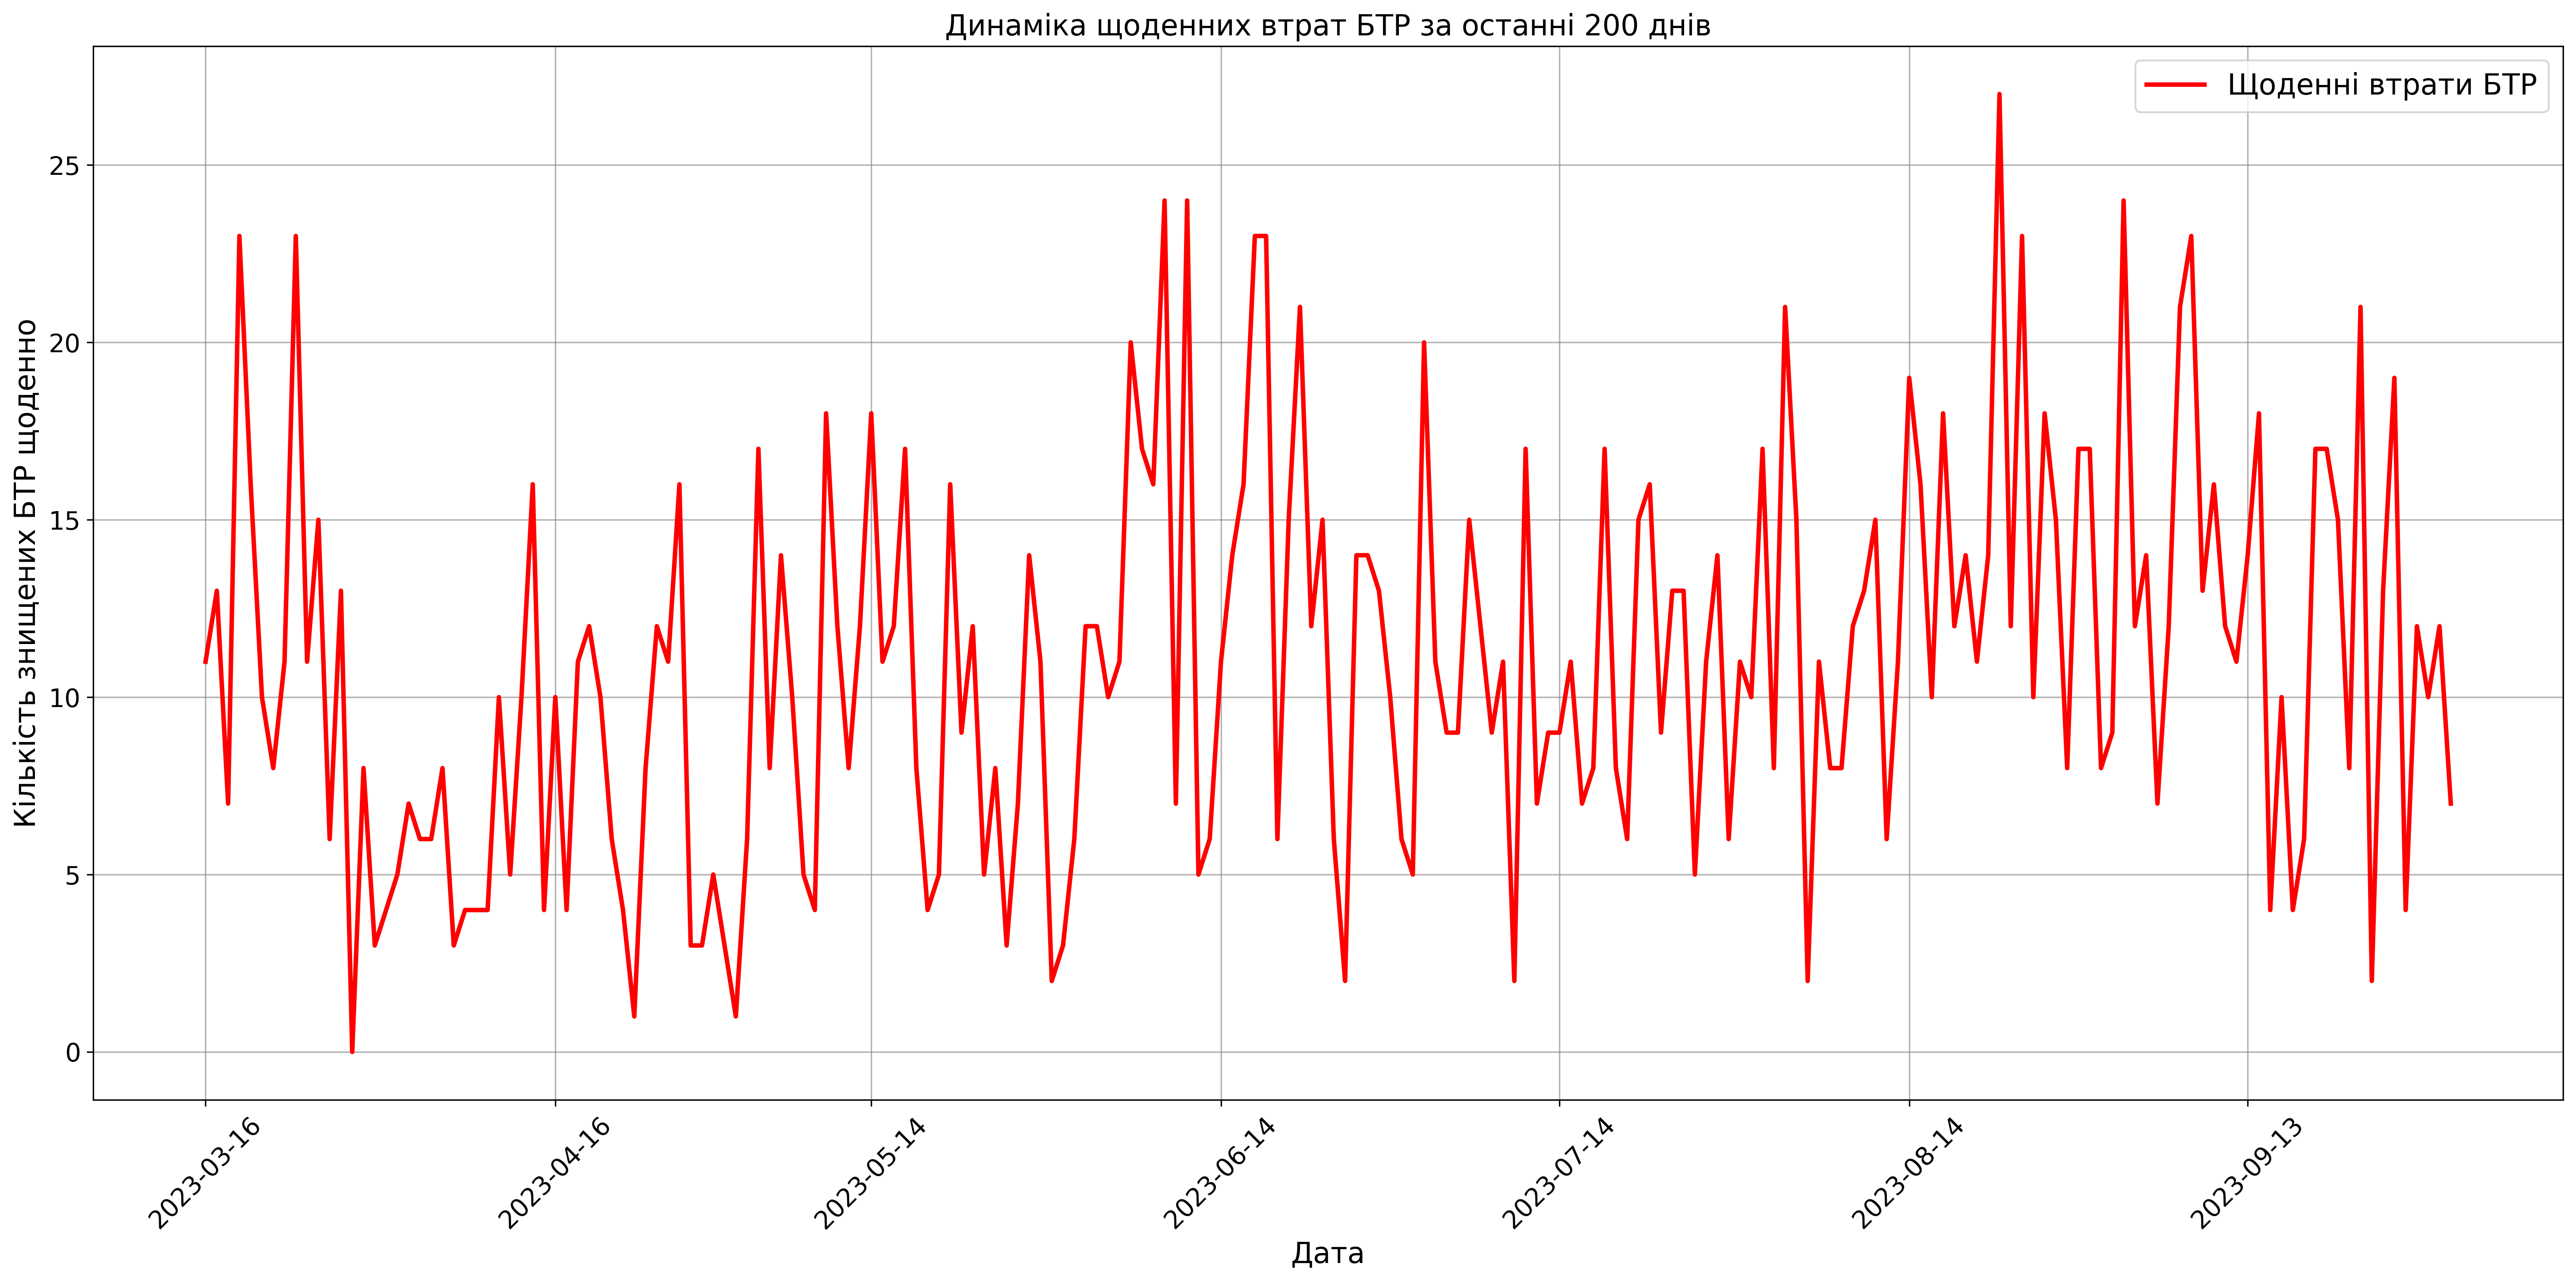

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.dates import MonthLocator

filename = 'russia_losses_equipment.csv'
data = pd.read_csv(filename)

date_data = data['date']
cumulative_losses = data['APC']

daily_losses = cumulative_losses.diff().fillna(cumulative_losses.iloc[0])

def apc_losses():
    plt.figure(figsize=(20, 10), dpi=300)

    # Задайте стиль линии и цвет
    plt.plot(date_data[-200:], daily_losses[-200:], linestyle='solid', color='red', label='Щоденні втрати БТР', linewidth=2.5)

    plt.xlabel('Дата')
    plt.ylabel('Кількість знищених БТР щоденно')
    plt.title('Динаміка щоденних втрат БТР за останні 200 днів')

    plt.grid(True)

    plt.legend()

    ax = plt.gca()
    ax.xaxis.set_major_locator(MonthLocator())

    # Повернуть метки на оси X
    plt.xticks(rotation=45)

    # Настройка шрифтов и размеров шрифтов
    plt.xlabel('Дата', fontsize=16)
    plt.ylabel('Кількість знищених БТР щоденно', fontsize=16)
    plt.title('Динаміка щоденних втрат БТР за останні 200 днів', fontsize=16)
    plt.legend(fontsize=16)

    # Измените цвет и стиль сетки
    plt.grid(True, linestyle='solid', alpha=0.6, color='grey')

    # Установите размер меток по осям X и Y
    plt.xticks(fontsize=14)
    plt.yticks(fontsize=14)

    # Изменить размер графика и сохранить его в файл
    plt.tight_layout()

    plt.savefig('losses.png', dpi=300) 

    plt.show()

apc_losses()


## Висновок

* Під час виконання цієї лабораторної роботи ми оволоділи необхідними навичками для успішної роботи з Python у сфері обробки та візуалізації даних. Зокрема, ми ознайомилися з Jupyter Notebook, який виявився потужним інструментом для аналізу і обробки даних, а також для створення різноманітних візуалізацій.

* Ми здійснили завантаження даних з файлу та опанували бібліотеку csv, що дозволило нам зручно та ефективно маніпулювати інформацією.

* Завдяки використанню векторизованих функцій і зрізів у бібліотеці numpy, ми зрозуміли, як ефективно обробляти дані без необхідності працювати з ітераціями, що підвищило продуктивність та зробило наш код більш читабельним.

* Ми набули вміння створювати графіки з використанням Matplotlib і дотримуватися вимог до візуалізацій, таких як налаштування типу ліній, додавання підписів до вісей, легенди для пояснення графічних об'єктів, сітки для кращої читабельності та контролю кольору та стилю ліній.

* Ми вдосконалили вигляд графіків, змінюючи їхні розміри та роздільну здатність, що допомогло підвищити якість та читабельність наших візуалізацій.

* Особливу увагу ми приділили збереженню графіків у форматі PNG, що є корисним для подальшого використання або обміну результатами аналізу.

Ця лабораторна робота стала важливим кроком у нашому професійному зростанні, надаючи нам необхідні навички для успішного аналізу та візуалізації даних. Ці здобуті вміння обов'язково знадобляться нам у майбутніх дослідженнях та аналітичних проектах.